# 1. Tokenization

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('punkt_tab')
corpus="""Hello! I like to eat Guava, grapes.
Meena's friends also like Guava.
"""

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
print(corpus)

Hello! I like to eat Guava, grapes.
Meena's friends also like Guava.



In [ ]:
# Tokenization
# Paragraph --> sentences
from nltk.tokenize import sent_tokenize
documents=sent_tokenize(corpus)
print(documents)

['Hello!', 'I like to eat Guava, grapes.', "Meena's friends also like Guava."]


In [ ]:
type(documents)

list

In [ ]:
for sentence in documents:
  print(sentence)

Hello!
I like to eat Guava, grapes.
Meena's friends also like Guava.


In [ ]:
# Tokenization
# paragraph --> words

from nltk.tokenize import word_tokenize   # 's is taken as one
words=word_tokenize(corpus)
print(words)

['Hello', '!', 'I', 'like', 'to', 'eat', 'Guava', ',', 'grapes', '.', 'Meena', "'s", 'friends', 'also', 'like', 'Guava', '.']


In [ ]:
# sentence --> words
for sentence in documents:
  print(word_tokenize(sentence))

['Hello', '!']
['I', 'like', 'to', 'eat', 'Guava', ',', 'grapes', '.']
['Meena', "'s", 'friends', 'also', 'like', 'Guava', '.']


In [ ]:
from nltk import wordpunct_tokenize # 's is taken as 2
wordpunct_tokenize(corpus)

['Hello',
 '!',
 'I',
 'like',
 'to',
 'eat',
 'Guava',
 ',',
 'grapes',
 '.',
 'Meena',
 "'",
 's',
 'friends',
 'also',
 'like',
 'Guava',
 '.']

In [ ]:
from nltk import TreebankWordTokenizer  # . is not treated separately, only last . is treated seprately
tokenizer=TreebankWordTokenizer()  # it is a class
tokenizer.tokenize(corpus)

['Hello',
 '!',
 'I',
 'like',
 'to',
 'eat',
 'Guava',
 ',',
 'grapes.',
 'Meena',
 "'s",
 'friends',
 'also',
 'like',
 'Guava',
 '.']

# 2. Stemming

In [ ]:
# PorterStemmer
from nltk.stem import PorterStemmer
stemming=PorterStemmer()

In [ ]:
words=['Eating','eats','eat','ate','Adjustable','rafting','ability','meeting','history']

In [ ]:
for word in words:
  print(word,'|',stemming.stem(word))

Eating | eat
eats | eat
eat | eat
ate | ate
Adjustable | adjust
rafting | raft
ability | abil
meeting | meet
history | histori


In [ ]:
#  disadvantage
print(stemming.stem('history'))
print(stemming.stem('congratulation'))

histori
congratul


In [ ]:
#  RegexStemmer class
from nltk.stem import RegexpStemmer
reg_stemmer=RegexpStemmer('ing$|s$|e$|able$',min=4)
print(reg_stemmer.stem('eating'))
print(reg_stemmer.stem('ingeating'))

eat
ingeat


In [ ]:
reg_stemmer2=RegexpStemmer('ing|s$|e$|able$',min=4)
print(reg_stemmer2.stem('eating'))
print(reg_stemmer2.stem('ingeating'))

eat
eat


In [ ]:
# Snowball Stemmer
from nltk.stem import SnowballStemmer
snowball_stemmer=SnowballStemmer('english')
for word in words:
  print(word,'|',snowball_stemmer.stem(word))

Eating | eat
eats | eat
eat | eat
ate | ate
Adjustable | adjust
rafting | raft
ability | abil
meeting | meet
history | histori


In [ ]:
# Difference between PorterStemmer and SnowballStemmer
print('PorterStemmer--> '+ stemming.stem('Generous')+',\t'+ stemming.stem('Fairly')+',\t'+stemming.stem('sportingly'))
print('SnowballStemmer--> '+ snowball_stemmer.stem('Generous')+',\t'+ snowball_stemmer.stem('Fairly')+',\t'+snowball_stemmer.stem('sportingly'))

PorterStemmer--> gener,	fairli,	sportingli
SnowballStemmer--> generous,	fair,	sport


# 3. Lemmatization

In [ ]:
# WordNet Lammatizer
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
lemmatizer.lemmatize('going')

'going'

In [ ]:
print(lemmatizer.lemmatize('going',pos='n'))    #pos(parts of speech) tag--> noun
print(lemmatizer.lemmatize('going',pos='v'))    #v-->verb
print(lemmatizer.lemmatize('going',pos='a'))    #a-->adjective
print(lemmatizer.lemmatize('going',pos='r'))    #r-->adverb

going
go
going
going


In [ ]:
for word in words:
  print(word,'|',lemmatizer.lemmatize(word,pos='v'))

Eating | Eating
eats | eat
eat | eat
ate | eat
Adjustable | Adjustable
rafting | raft
ability | ability
meeting | meet
history | history


# 4. Stopword

In [ ]:
paragraph=""" In today’s digital world, the amount of textual data generated every second is staggering.
From social media updates and customer reviews to news articles and research papers, unstructured text is everywhere.
Natural Language Processing, commonly known as NLP, plays a crucial role in transforming this raw data into meaningful insights.
Businesses use NLP to analyze customer sentiment, automate support services, and detect trends in market behavior.
For example, sentiment analysis helps companies understand how their products are perceived by users,
while chatbots powered by NLP provide instant customer assistance without human intervention.
Despite its success, NLP still faces challenges when it comes to context understanding, irony, cultural nuances, and multilingual support.
With the rapid advancements in machine learning and deep learning, however, NLP is constantly evolving, making machines more capable of truly understanding human language.
Researchers are working on large language models, better datasets, and more accurate algorithms to bridge the gap between human and machine communication. History. Generous.
"""

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
stopwords=stopwords.words('english')
stopwords

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [ ]:
sentences=nltk.sent_tokenize(paragraph)
temp=sentences

In [ ]:
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()
# Apply stopwords and filter and then apply stemming
for i in range(len(sentences)):
  words=nltk.word_tokenize(sentences[i])
  words=[stemmer.stem(word) for word in words if word not in set(stopwords)]
  temp[i]=' '.join(words)
temp

['in today ’ digit world , amount textual data gener everi second stagger .',
 'from social media updat custom review news articl research paper , unstructur text everywher .',
 'natur languag process , commonli known nlp , play crucial role transform raw data meaning insight .',
 'busi use nlp analyz custom sentiment , autom support servic , detect trend market behavior .',
 'for exampl , sentiment analysi help compani understand product perceiv user , chatbot power nlp provid instant custom assist without human intervent .',
 'despit success , nlp still face challeng come context understand , ironi , cultur nuanc , multilingu support .',
 'with rapid advanc machin learn deep learn , howev , nlp constantli evolv , make machin capabl truli understand human languag .',
 'research work larg languag model , better dataset , accur algorithm bridg gap human machin commun .',
 'histori .',
 'gener .']

In [ ]:
from nltk.stem import SnowballStemmer
snowballstemmer=SnowballStemmer('english')
# Apply stopwords and filter and then apply stemming
for i in range(len(sentences)):
  words=nltk.word_tokenize(sentences[i])
  words=[snowballstemmer.stem(word) for word in words if word not in set(stopwords)]
  temp[i]=' '.join(words)
temp

['in today ’ digit world , amount textual data generat everi second stagger .',
 'from social media updat custom review news articl research paper , unstructur text everywher .',
 'natur languag process , common know nlp , play crucial role transform raw data meaning insight .',
 'busi use nlp analyz custom sentiment , autom support servic , detect trend market behavior .',
 'for exampl , sentiment analysi help compani understand product perceiv user , chatbot power nlp provid instant custom assist without human intervent .',
 'despit success , nlp still face challeng come context understand , ironi , cultur nuanc , multilingu support .',
 'with rapid advanc machin learn deep learn , howev , nlp constant evolv , make machin capabl truli understand human languag .',
 'research work larg languag model , better dataset , accur algorithm bridg gap human machin communic .',
 'histori .',
 'generous .']

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
# Apply stopwords and filter and then apply stemming
for i in range(len(sentences)):
  words=nltk.word_tokenize(sentences[i])
  words=[lemmatizer.lemmatize(word) for word in words if word not in set(stopwords)]
  temp[i]=' '.join(words)
temp

['In today ’ digital world , amount textual data generated every second staggering .',
 'From social medium update customer review news article research paper , unstructured text everywhere .',
 'Natural Language Processing , commonly known NLP , play crucial role transforming raw data meaningful insight .',
 'Businesses use NLP analyze customer sentiment , automate support service , detect trend market behavior .',
 'For example , sentiment analysis help company understand product perceived user , chatbots powered NLP provide instant customer assistance without human intervention .',
 'Despite success , NLP still face challenge come context understanding , irony , cultural nuance , multilingual support .',
 'With rapid advancement machine learning deep learning , however , NLP constantly evolving , making machine capable truly understanding human language .',
 'Researchers working large language model , better datasets , accurate algorithm bridge gap human machine communication .',
 '

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
# Apply stopwords and filter and then apply stemming
for i in range(len(sentences)):
  words=nltk.word_tokenize(sentences[i])
  words=[lemmatizer.lemmatize(word.lower()) for word in words if word not in set(stopwords)]    #word.lower()
  temp[i]=' '.join(words)
temp

['in today ’ digital world , amount textual data generated every second staggering .',
 'from social medium update customer review news article research paper , unstructured text everywhere .',
 'natural language processing , commonly known nlp , play crucial role transforming raw data meaningful insight .',
 'business use nlp analyze customer sentiment , automate support service , detect trend market behavior .',
 'for example , sentiment analysis help company understand product perceived user , chatbots powered nlp provide instant customer assistance without human intervention .',
 'despite success , nlp still face challenge come context understanding , irony , cultural nuance , multilingual support .',
 'with rapid advancement machine learning deep learning , however , nlp constantly evolving , making machine capable truly understanding human language .',
 'researcher working large language model , better datasets , accurate algorithm bridge gap human machine communication .',
 'his

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
# Apply stopwords and filter and then apply stemming
for i in range(len(sentences)):
  words=nltk.word_tokenize(sentences[i])
  words=[lemmatizer.lemmatize(word, pos='v') for word in words if word not in set(stopwords)]    #word.lower()
  temp[i]=' '.join(words)
temp

['In today ’ digital world , amount textual data generate every second stagger .',
 'From social media update customer review news article research paper , unstructured text everywhere .',
 'Natural Language Processing , commonly know NLP , play crucial role transform raw data meaningful insights .',
 'Businesses use NLP analyze customer sentiment , automate support service , detect trend market behavior .',
 'For example , sentiment analysis help company understand products perceive users , chatbots power NLP provide instant customer assistance without human intervention .',
 'Despite success , NLP still face challenge come context understand , irony , cultural nuances , multilingual support .',
 'With rapid advancements machine learn deep learn , however , NLP constantly evolve , make machine capable truly understand human language .',
 'Researchers work large language model , better datasets , accurate algorithms bridge gap human machine communication .',
 'History .',
 'Generous .'

# 5. Parts of Speech
 Penn Treebank POS Tags (widely used in NLM/NLP):

CC – Coordinating conjunction (e.g., and, but, or)

CD – Cardinal number (e.g., one, two, 3.14)

DT – Determiner (e.g., the, a, an)

EX – Existential “there” (e.g., there is)

FW – Foreign word

IN – Preposition or subordinating conjunction (e.g., in, of, although)

JJ – Adjective (e.g., red, quick)

JJR – Comparative adjective (e.g., bigger, faster)

JJS – Superlative adjective (e.g., biggest, best)

LS – List item marker (e.g., 1), A))

MD – Modal verb (e.g., can, should, must)

NN – Noun, singular (e.g., cat, truth)

NNS – Noun, plural (e.g., cats, cars)

NNP – Proper noun, singular (e.g., India, John)

NNPS – Proper noun, plural (e.g., Americans)

PDT – Predeterminer (e.g., all, both in "both the boys")

POS – Possessive ending (e.g., ’s)

PRP – Personal pronoun (e.g., I, you, he)

PRP$ – Possessive pronoun (e.g., my, his, their)

RB – Adverb (e.g., quickly, very)

RBR – Comparative adverb (e.g., faster)

RBS – Superlative adverb (e.g., fastest)

RP – Particle (e.g., up, off in "give up")

SYM – Symbol (e.g., $, %, =)

TO – The word “to” as in "to go"

UH – Interjection (e.g., oh, wow, uh)

VB – Verb, base form (e.g., go, eat)

VBD – Verb, past tense (e.g., went, ate)

VBG – Verb, gerund/present participle (e.g., going, eating)

VBN – Verb, past participle (e.g., gone, eaten)

VBP – Verb, non-3rd person singular present (e.g., go, eat)

VBZ – Verb, 3rd person singular present (e.g., goes, eats)

WDT – Wh-determiner (e.g., which, that)

WP – Wh-pronoun (e.g., who, what)

WP$ – Possessive wh-pronoun (e.g., whose)

WRB – Wh-adverb (e.g., when, where, why)


In [ ]:
paragraph = """I have three visions for India. In 3000 years of our history, people from all over
               the world have come and invaded us, captured our lands, conquered our minds.
               From Alexander onwards, the Greeks, the Turks, the Moguls, the Portuguese, the British,
               the French, the Dutch, all of them came and looted us, took over what was ours.
               Yet we have not done this to any other nation. We have not conquered anyone.
               We have not grabbed their land, their culture,
               their history and tried to enforce our way of life on them.
               Why? Because we respect the freedom of others.That is why my
               first vision is that of freedom. I believe that India got its first vision of
               this in 1857, when we started the War of Independence. It is this freedom that
               we must protect and nurture and build on. If we are not free, no one will respect us.
               My second vision for India’s development. For fifty years we have been a developing nation.
               It is time we see ourselves as a developed nation. We are among the top 5 nations of the world
               in terms of GDP. We have a 10 percent growth rate in most areas. Our poverty levels are falling.
               Our achievements are being globally recognised today. Yet we lack the self-confidence to
               see ourselves as a developed nation, self-reliant and self-assured. Isn’t this incorrect?
               I have a third vision. India must stand up to the world. Because I believe that unless India
               stands up to the world, no one will respect us. Only strength respects strength. We must be
               strong not only as a military power but also as an economic power. Both must go hand-in-hand.
               My good fortune was to have worked with three great minds. Dr. Vikram Sarabhai of the Dept. of
               space, Professor Satish Dhawan, who succeeded him and Dr. Brahm Prakash, father of nuclear material.
               I was lucky to have worked with all three of them closely and consider this the great opportunity of my life.
               I see four milestones in my career"""

In [ ]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk.corpus import stopwords
sentences=nltk.sent_tokenize(paragraph)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
nltk.download('averaged_perceptron_tagger_eng')
for i in range(len(sentences)):
  words=nltk.word_tokenize(sentences[i])
  words=[word for word in words if word not in set(stopwords.words('english'))]
  pos_tag=nltk.pos_tag(words)
  print(pos_tag)

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


[('I', 'PRP'), ('three', 'CD'), ('visions', 'NNS'), ('India', 'NNP'), ('.', '.')]
[('In', 'IN'), ('3000', 'CD'), ('years', 'NNS'), ('history', 'NN'), (',', ','), ('people', 'NNS'), ('world', 'NN'), ('come', 'VBP'), ('invaded', 'VBN'), ('us', 'PRP'), (',', ','), ('captured', 'VBD'), ('lands', 'NNS'), (',', ','), ('conquered', 'VBD'), ('minds', 'NNS'), ('.', '.')]
[('From', 'IN'), ('Alexander', 'NNP'), ('onwards', 'NNS'), (',', ','), ('Greeks', 'NNP'), (',', ','), ('Turks', 'NNP'), (',', ','), ('Moguls', 'NNP'), (',', ','), ('Portuguese', 'NNP'), (',', ','), ('British', 'NNP'), (',', ','), ('French', 'NNP'), (',', ','), ('Dutch', 'NNP'), (',', ','), ('came', 'VBD'), ('looted', 'JJ'), ('us', 'PRP'), (',', ','), ('took', 'VBD'), ('.', '.')]
[('Yet', 'RB'), ('done', 'VBN'), ('nation', 'NN'), ('.', '.')]
[('We', 'PRP'), ('conquered', 'VBD'), ('anyone', 'NN'), ('.', '.')]
[('We', 'PRP'), ('grabbed', 'VBD'), ('land', 'NN'), (',', ','), ('culture', 'NN'), (',', ','), ('history', 'NN'), ('tried'

In [ ]:
nltk.pos_tag('Today is a regular day'.split())

[('Today', 'NN'), ('is', 'VBZ'), ('a', 'DT'), ('regular', 'JJ'), ('day', 'NN')]

# 6. Named Entity Recognization

In [ ]:
sentence="The Eiffel Tower was built from 1887 to 1889 by Gustave Eiffel, whose company specialized in building metal frameworks and structures."

In [ ]:
import nltk
words=nltk.word_tokenize(sentence)
pos_tags=nltk.pos_tag(words)

In [ ]:
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [ ]:
nltk.ne_chunk(pos_tags).draw()

TclError: no display name and no $DISPLAY environment variable

In [ ]:
pip install svgling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 3.1 MB/s eta 0:00:00


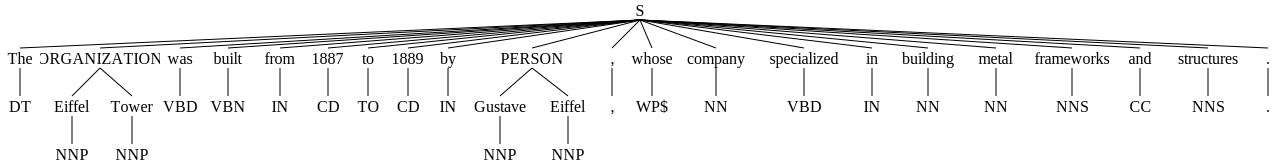

In [ ]:
import nltk
from nltk.draw.tree import TreeView
import svgling

# After creating the chunks
chunks = nltk.ne_chunk(pos_tags)

# using svgling to display an SVG representation of the tree
svg = svgling.draw_tree(chunks)
display(svg)

# 7. Different types of Encoding


*   One Hot Encoding
*   Bag of words (BOW)
*   TF-IDF
*   Word2vec
*   AvgWord2vec



# 8. Word2Vec

In [ ]:
pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 859.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 7.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [ ]:
!pip install numpy
import numpy as np
import gensim
from gensim.models import Word2Vec, KeyedVectors

ModuleNotFoundError: No module named 'numpy.strings'

In [ ]:
!pip install -U numpy
!pip install scipy
import numpy as np
import gensim
from gensim.models import Word2Vec, KeyedVectors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 75.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.


ImportError: cannot import name '_center' from 'numpy._core.umath' (/usr/local/lib/python3.11/dist-packages/numpy/_core/umath.py)

In [ ]:
!pip uninstall numpy
!pip uninstall scipy

Found existing installation: numpy 2.2.4
Uninstalling numpy-2.2.4:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/bin/numpy-config
    /usr/local/lib/python3.11/dist-packages/numpy-2.2.4.dist-info/*
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libgfortran-040039e1-0352e75f.so.5.0.0
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libquadmath-96973f99-934c22de.so.0.0.0
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libscipy_openblas64_-6bb31eeb.so
    /usr/local/lib/python3.11/dist-packages/numpy/*
Proceed (Y/n)? Y
  Successfully uninstalled numpy-2.2.4
Found existing installation: scipy 1.13.1
Uninstalling scipy-1.13.1:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/scipy-1.13.1.dist-info/*
    /usr/local/lib/python3.11/dist-packages/scipy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.11/dist-packages/scipy.libs/libopenblasp-r0-01191904.3.27.so
    /usr/local/lib/python3.11/dist-packages/scipy.libs/libquadmath-96973f99.so.0.0

In [ ]:
!pip install numpy==1.25.2
!pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 49.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, which is not installed.
xarray-einstats 0.8.0 requires scipy>=1.9, which is not installed.
pymc 5.21.2 requires scipy>=1.4.1, which is not installed.
mlxtend 0.23.4 requires scipy>=1.2.1, which is not installed.
umap-learn 0.5.7 requires scipy>=1.3.1, which is not installed.
scikit-image 0.25.2 requires scipy>=1.11.4, which is not installed.
xgboost 2.1.4 requires scipy, which is not installed.
librosa 0.11.0 requires scipy>=1.6.0, which is not installed.
datascience 0.17.6 requires scipy, which is not installed.
jaxlib 0.5.1 requires scipy>=1.11.1, which is not installed.
plotnine 0.14.5 requires scipy>=1.8.0, which is not installed.
treelite 4.4.1 requires scipy, which is not installed.
arvi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 14.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.15.2 which is incompatible.


In [ ]:
import numpy as np
import gensim
from gensim.models import Word2Vec, KeyedVectors

In [ ]:
import gensim.downloader as api
wv=api.load('word2vec-google-news-300')
vec_king=wv['king']

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
vec_king

array([ 1.25976562e-01,  2.97851562e-02,  8.60595703e-03,  1.39648438e-01,
       -2.56347656e-02, -3.61328125e-02,  1.11816406e-01, -1.98242188e-01,
        5.12695312e-02,  3.63281250e-01, -2.42187500e-01, -3.02734375e-01,
       -1.77734375e-01, -2.49023438e-02, -1.67968750e-01, -1.69921875e-01,
        3.46679688e-02,  5.21850586e-03,  4.63867188e-02,  1.28906250e-01,
        1.36718750e-01,  1.12792969e-01,  5.95703125e-02,  1.36718750e-01,
        1.01074219e-01, -1.76757812e-01, -2.51953125e-01,  5.98144531e-02,
        3.41796875e-01, -3.11279297e-02,  1.04492188e-01,  6.17675781e-02,
        1.24511719e-01,  4.00390625e-01, -3.22265625e-01,  8.39843750e-02,
        3.90625000e-02,  5.85937500e-03,  7.03125000e-02,  1.72851562e-01,
        1.38671875e-01, -2.31445312e-01,  2.83203125e-01,  1.42578125e-01,
        3.41796875e-01, -2.39257812e-02, -1.09863281e-01,  3.32031250e-02,
       -5.46875000e-02,  1.53198242e-02, -1.62109375e-01,  1.58203125e-01,
       -2.59765625e-01,  

In [ ]:
vec_king.shape

(300,)

In [ ]:
wv['cricket']

array([-3.67187500e-01, -1.21582031e-01,  2.85156250e-01,  8.15429688e-02,
        3.19824219e-02, -3.19824219e-02,  1.34765625e-01, -2.73437500e-01,
        9.46044922e-03, -1.07421875e-01,  2.48046875e-01, -6.05468750e-01,
        5.02929688e-02,  2.98828125e-01,  9.57031250e-02,  1.39648438e-01,
       -5.41992188e-02,  2.91015625e-01,  2.85156250e-01,  1.51367188e-01,
       -2.89062500e-01, -3.46679688e-02,  1.81884766e-02, -3.92578125e-01,
        2.46093750e-01,  2.51953125e-01, -9.86328125e-02,  3.22265625e-01,
        4.49218750e-01, -1.36718750e-01, -2.34375000e-01,  4.12597656e-02,
       -2.15820312e-01,  1.69921875e-01,  2.56347656e-02,  1.50146484e-02,
       -3.75976562e-02,  6.95800781e-03,  4.00390625e-01,  2.09960938e-01,
        1.17675781e-01, -4.19921875e-02,  2.34375000e-01,  2.03125000e-01,
       -1.86523438e-01, -2.46093750e-01,  3.12500000e-01, -2.59765625e-01,
       -1.06933594e-01,  1.04003906e-01, -1.79687500e-01,  5.71289062e-02,
       -7.41577148e-03, -

In [ ]:
wv.most_similar('cricket')

[('cricketing', 0.8372225761413574),
 ('cricketers', 0.8165745735168457),
 ('Test_cricket', 0.8094819188117981),
 ('Twenty##_cricket', 0.8068488240242004),
 ('Twenty##', 0.7624265551567078),
 ('Cricket', 0.75413978099823),
 ('cricketer', 0.7372578382492065),
 ('twenty##', 0.7316356897354126),
 ('T##_cricket', 0.7304614186286926),
 ('West_Indies_cricket', 0.6987985968589783)]

In [ ]:
wv.similarity('man','woman')

0.76640123

In [ ]:
vec=wv['king']-wv['man']+wv['woman']

In [ ]:
wv.most_similar([vec])

[('king', 0.8449392318725586),
 ('queen', 0.7300517559051514),
 ('monarch', 0.645466148853302),
 ('princess', 0.6156251430511475),
 ('crown_prince', 0.5818676352500916),
 ('prince', 0.5777117609977722),
 ('kings', 0.5613663792610168),
 ('sultan', 0.5376775860786438),
 ('Queen_Consort', 0.5344247817993164),
 ('queens', 0.5289887189865112)]

# 9. Scratch word2vec

In [ ]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

# 1. Sample corpus (list of tokenized sentences)
corpus = [
    "the cat sat on the mat",
    "the dog ran in the park",
    "cats love to play with dogs"
]

# 2. Preprocess the corpus (tokenize and lowercase)
sentences = [simple_preprocess(sentence) for sentence in corpus]
# Result: [['the', 'cat', 'sat', 'on', 'the', 'mat'], ...]

# 3. Train the Word2Vec model (Skip-Gram)
model = Word2Vec(
    sentences=sentences,        # Input: list of tokenized sentences
    vector_size=100,           # Embedding dimension
    window=5,                  # Context window size
    sg=1,                      # 1 for Skip-Gram, 0 for CBOW
    min_count=1,               # Min word frequency to include
    workers=4,                 # Number of CPU cores
    negative=5,                # Number of negative samples
    epochs=10                  # Training iterations
)

# 4. Access results
# Get embedding for a word
# print("Embedding for 'cat':", model.wv['cat'])

# Find similar words
print("Words similar to 'cat':", model.wv.most_similar('cat', topn=5))

# Compute similarity between two words
print("Similarity between 'cat' and 'dog':", model.wv.similarity('cat', 'dog'))

Words similar to 'cat': [('play', 0.17826786637306213), ('dogs', 0.16072483360767365), ('park', 0.10560770332813263), ('on', 0.09215974807739258), ('sat', 0.027008360251784325)]
Similarity between 'cat' and 'dog': -0.046497855


# 10. BPE(byte pair embedding) + word2vec

In [ ]:
corpus ="""In today’s digital world, the amount of textual data generated every second is staggering.
From social media updates and customer reviews to news articles and research papers, unstructured text is everywhere.
Natural Language Processing, commonly known as NLP, plays a crucial role in transforming this raw data into meaningful insights.
Businesses use NLP to analyze customer sentiment, automate support services, and detect trends in market behavior.
For example, sentiment analysis helps companies understand how their products are perceived by users,
while chatbots powered by NLP provide instant customer assistance without human intervention.
Despite its success, NLP still faces challenges when it comes to context understanding, irony, cultural nuances, and multilingual support.
With the rapid advancements in machine learning and deep learning, however, NLP is constantly evolving, making machines more capable of truly understanding human language.
Researchers are working on large language models, better datasets, and more accurate algorithms to bridge the gap between human and machine communication. History. Generous.
"""

In [ ]:
from nltk import word_tokenize
words=nltk.word_tokenize(corpus)
words

['In',
 'today',
 '’',
 's',
 'digital',
 'world',
 ',',
 'the',
 'amount',
 'of',
 'textual',
 'data',
 'generated',
 'every',
 'second',
 'is',
 'staggering',
 '.',
 'From',
 'social',
 'media',
 'updates',
 'and',
 'customer',
 'reviews',
 'to',
 'news',
 'articles',
 'and',
 'research',
 'papers',
 ',',
 'unstructured',
 'text',
 'is',
 'everywhere',
 '.',
 'Natural',
 'Language',
 'Processing',
 ',',
 'commonly',
 'known',
 'as',
 'NLP',
 ',',
 'plays',
 'a',
 'crucial',
 'role',
 'in',
 'transforming',
 'this',
 'raw',
 'data',
 'into',
 'meaningful',
 'insights',
 '.',
 'Businesses',
 'use',
 'NLP',
 'to',
 'analyze',
 'customer',
 'sentiment',
 ',',
 'automate',
 'support',
 'services',
 ',',
 'and',
 'detect',
 'trends',
 'in',
 'market',
 'behavior',
 '.',
 'For',
 'example',
 ',',
 'sentiment',
 'analysis',
 'helps',
 'companies',
 'understand',
 'how',
 'their',
 'products',
 'are',
 'perceived',
 'by',
 'users',
 ',',
 'while',
 'chatbots',
 'powered',
 'by',
 'NLP',
 'pro

In [ ]:
a=corpus.split()
words=[word+'_' for word in a]
print(words)

['In_', 'today’s_', 'digital_', 'world,_', 'the_', 'amount_', 'of_', 'textual_', 'data_', 'generated_', 'every_', 'second_', 'is_', 'staggering._', 'From_', 'social_', 'media_', 'updates_', 'and_', 'customer_', 'reviews_', 'to_', 'news_', 'articles_', 'and_', 'research_', 'papers,_', 'unstructured_', 'text_', 'is_', 'everywhere._', 'Natural_', 'Language_', 'Processing,_', 'commonly_', 'known_', 'as_', 'NLP,_', 'plays_', 'a_', 'crucial_', 'role_', 'in_', 'transforming_', 'this_', 'raw_', 'data_', 'into_', 'meaningful_', 'insights._', 'Businesses_', 'use_', 'NLP_', 'to_', 'analyze_', 'customer_', 'sentiment,_', 'automate_', 'support_', 'services,_', 'and_', 'detect_', 'trends_', 'in_', 'market_', 'behavior._', 'For_', 'example,_', 'sentiment_', 'analysis_', 'helps_', 'companies_', 'understand_', 'how_', 'their_', 'products_', 'are_', 'perceived_', 'by_', 'users,_', 'while_', 'chatbots_', 'powered_', 'by_', 'NLP_', 'provide_', 'instant_', 'customer_', 'assistance_', 'without_', 'human_', 

In [ ]:
# Calculate frequency1
from collections import Counter

freqs = Counter(words)
print("Word frequencies:", freqs)

Word frequencies: Counter({'and_': 7, 'to_': 4, 'NLP_': 4, 'the_': 3, 'is_': 3, 'customer_': 3, 'in_': 3, 'human_': 3, 'of_': 2, 'data_': 2, 'are_': 2, 'by_': 2, 'machine_': 2, 'more_': 2, 'In_': 1, 'today’s_': 1, 'digital_': 1, 'world,_': 1, 'amount_': 1, 'textual_': 1, 'generated_': 1, 'every_': 1, 'second_': 1, 'staggering._': 1, 'From_': 1, 'social_': 1, 'media_': 1, 'updates_': 1, 'reviews_': 1, 'news_': 1, 'articles_': 1, 'research_': 1, 'papers,_': 1, 'unstructured_': 1, 'text_': 1, 'everywhere._': 1, 'Natural_': 1, 'Language_': 1, 'Processing,_': 1, 'commonly_': 1, 'known_': 1, 'as_': 1, 'NLP,_': 1, 'plays_': 1, 'a_': 1, 'crucial_': 1, 'role_': 1, 'transforming_': 1, 'this_': 1, 'raw_': 1, 'into_': 1, 'meaningful_': 1, 'insights._': 1, 'Businesses_': 1, 'use_': 1, 'analyze_': 1, 'sentiment,_': 1, 'automate_': 1, 'support_': 1, 'services,_': 1, 'detect_': 1, 'trends_': 1, 'market_': 1, 'behavior._': 1, 'For_': 1, 'example,_': 1, 'sentiment_': 1, 'analysis_': 1, 'helps_': 1, 'com

In [ ]:
# Calculate frequency2
freqs = {}
for word in words:
    if word in freqs:
        freqs[word] += 1
    else:
        freqs[word] = 1

# Print results
print("Word frequencies:", freqs)

Word frequencies: {'In_': 1, 'today’s_': 1, 'digital_': 1, 'world,_': 1, 'the_': 3, 'amount_': 1, 'of_': 2, 'textual_': 1, 'data_': 2, 'generated_': 1, 'every_': 1, 'second_': 1, 'is_': 3, 'staggering._': 1, 'From_': 1, 'social_': 1, 'media_': 1, 'updates_': 1, 'and_': 7, 'customer_': 3, 'reviews_': 1, 'to_': 4, 'news_': 1, 'articles_': 1, 'research_': 1, 'papers,_': 1, 'unstructured_': 1, 'text_': 1, 'everywhere._': 1, 'Natural_': 1, 'Language_': 1, 'Processing,_': 1, 'commonly_': 1, 'known_': 1, 'as_': 1, 'NLP,_': 1, 'plays_': 1, 'a_': 1, 'crucial_': 1, 'role_': 1, 'in_': 3, 'transforming_': 1, 'this_': 1, 'raw_': 1, 'into_': 1, 'meaningful_': 1, 'insights._': 1, 'Businesses_': 1, 'use_': 1, 'NLP_': 4, 'analyze_': 1, 'sentiment,_': 1, 'automate_': 1, 'support_': 1, 'services,_': 1, 'detect_': 1, 'trends_': 1, 'market_': 1, 'behavior._': 1, 'For_': 1, 'example,_': 1, 'sentiment_': 1, 'analysis_': 1, 'helps_': 1, 'companies_': 1, 'understand_': 1, 'how_': 1, 'their_': 1, 'products_': 1

In [ ]:
vocab=[]
for word in words:
  for letter in word:
    if letter not in vocab:
      vocab.append(letter)
vocab.sort()
vocab

[',',
 '.',
 'B',
 'D',
 'F',
 'G',
 'H',
 'I',
 'L',
 'N',
 'P',
 'R',
 'W',
 '_',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '’']

In [ ]:
splits = {word: [c for c in word] for word in freqs.keys()}
splits

{'In_': ['I', 'n', '_'],
 'today’s_': ['t', 'o', 'd', 'a', 'y', '’', 's', '_'],
 'digital_': ['d', 'i', 'g', 'i', 't', 'a', 'l', '_'],
 'world,_': ['w', 'o', 'r', 'l', 'd', ',', '_'],
 'the_': ['t', 'h', 'e', '_'],
 'amount_': ['a', 'm', 'o', 'u', 'n', 't', '_'],
 'of_': ['o', 'f', '_'],
 'textual_': ['t', 'e', 'x', 't', 'u', 'a', 'l', '_'],
 'data_': ['d', 'a', 't', 'a', '_'],
 'generated_': ['g', 'e', 'n', 'e', 'r', 'a', 't', 'e', 'd', '_'],
 'every_': ['e', 'v', 'e', 'r', 'y', '_'],
 'second_': ['s', 'e', 'c', 'o', 'n', 'd', '_'],
 'is_': ['i', 's', '_'],
 'staggering._': ['s', 't', 'a', 'g', 'g', 'e', 'r', 'i', 'n', 'g', '.', '_'],
 'From_': ['F', 'r', 'o', 'm', '_'],
 'social_': ['s', 'o', 'c', 'i', 'a', 'l', '_'],
 'media_': ['m', 'e', 'd', 'i', 'a', '_'],
 'updates_': ['u', 'p', 'd', 'a', 't', 'e', 's', '_'],
 'and_': ['a', 'n', 'd', '_'],
 'customer_': ['c', 'u', 's', 't', 'o', 'm', 'e', 'r', '_'],
 'reviews_': ['r', 'e', 'v', 'i', 'e', 'w', 's', '_'],
 'to_': ['t', 'o', '_'],


In [ ]:
!pip install collections

ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections


In [ ]:
from collections import defaultdict
def compute_pair_freqs(splits):
    pair_freqs = defaultdict(int)
    # pair_freqs = 0
    for word, freq in freqs.items():
        split = splits[word]
        if len(split) == 1:
            continue
        for i in range(len(split) - 1):
            pair = (split[i], split[i + 1])
            pair_freqs[pair] += freq
    return pair_freqs

In [ ]:
pair_freqs = compute_pair_freqs(splits)
print(pair_freqs)
# for i, key in enumerate(pair_freqs.keys()):
#     print(f"{key}: {pair_freqs[key]}")
#     if i >= 5:
#         break

defaultdict(<class 'int'>, {('I', 'n'): 1, ('n', '_'): 11, ('t', 'o'): 11, ('o', 'd'): 3, ('d', 'a'): 5, ('a', 'y'): 2, ('y', '’'): 1, ('’', 's'): 1, ('s', '_'): 26, ('d', 'i'): 4, ('i', 'g'): 2, ('g', 'i'): 1, ('i', 't'): 7, ('t', 'a'): 11, ('a', 'l'): 11, ('l', '_'): 9, ('w', 'o'): 2, ('o', 'r'): 11, ('r', 'l'): 1, ('l', 'd'): 1, ('d', ','): 1, (',', '_'): 17, ('t', 'h'): 8, ('h', 'e'): 8, ('e', '_'): 23, ('a', 'm'): 2, ('m', 'o'): 5, ('o', 'u'): 3, ('u', 'n'): 6, ('n', 't'): 12, ('t', '_'): 10, ('o', 'f'): 2, ('f', '_'): 2, ('t', 'e'): 11, ('e', 'x'): 4, ('x', 't'): 3, ('t', 'u'): 4, ('u', 'a'): 6, ('a', 't'): 10, ('a', '_'): 4, ('g', 'e'): 8, ('e', 'n'): 12, ('n', 'e'): 7, ('e', 'r'): 21, ('r', 'a'): 7, ('e', 'd'): 5, ('d', '_'): 14, ('e', 'v'): 5, ('v', 'e'): 5, ('r', 'y'): 3, ('y', '_'): 6, ('s', 'e'): 10, ('e', 'c'): 2, ('c', 'o'): 7, ('o', 'n'): 8, ('n', 'd'): 15, ('i', 's'): 7, ('s', 't'): 13, ('a', 'g'): 4, ('g', 'g'): 1, ('r', 'i'): 3, ('i', 'n'): 23, ('n', 'g'): 16, ('g', '

In [ ]:
best_pair = ""
max_freq = 0

for pair, freq in pair_freqs.items():
    if max_freq < freq:
        best_pair = pair
        max_freq = freq

print(best_pair, max_freq)

('s', '_') 26


In [ ]:
# merges = {("t", "h"): "th"}
# vocab.append("th")
# merges

In [ ]:
def merge_pair(a, b, splits):
    for word in freqs:
        split = splits[word]
        if len(split) == 1:
            continue

        i = 0
        while i < len(split) - 1:
            if split[i] == a and split[i + 1] == b:
                split = split[:i] + [a + b] + split[i + 2 :]
            else:
                i += 1
        splits[word] = split
    return splits

In [ ]:
# splits=merge_pair('t','h',splits)
# print(splits['with_'])

In [ ]:
print(pair_freqs)

defaultdict(<class 'int'>, {('I', 'n'): 1, ('n', '_'): 11, ('t', 'o'): 11, ('o', 'd'): 3, ('d', 'a'): 5, ('a', 'y'): 2, ('y', '’'): 1, ('’', 's'): 1, ('s', '_'): 26, ('d', 'i'): 4, ('i', 'g'): 2, ('g', 'i'): 1, ('i', 't'): 7, ('t', 'a'): 11, ('a', 'l'): 11, ('l', '_'): 9, ('w', 'o'): 2, ('o', 'r'): 11, ('r', 'l'): 1, ('l', 'd'): 1, ('d', ','): 1, (',', '_'): 17, ('t', 'h'): 8, ('h', 'e'): 8, ('e', '_'): 23, ('a', 'm'): 2, ('m', 'o'): 5, ('o', 'u'): 3, ('u', 'n'): 6, ('n', 't'): 12, ('t', '_'): 10, ('o', 'f'): 2, ('f', '_'): 2, ('t', 'e'): 11, ('e', 'x'): 4, ('x', 't'): 3, ('t', 'u'): 4, ('u', 'a'): 6, ('a', 't'): 10, ('a', '_'): 4, ('g', 'e'): 8, ('e', 'n'): 12, ('n', 'e'): 7, ('e', 'r'): 21, ('r', 'a'): 7, ('e', 'd'): 5, ('d', '_'): 14, ('e', 'v'): 5, ('v', 'e'): 5, ('r', 'y'): 3, ('y', '_'): 6, ('s', 'e'): 10, ('e', 'c'): 2, ('c', 'o'): 7, ('o', 'n'): 8, ('n', 'd'): 15, ('i', 's'): 7, ('s', 't'): 13, ('a', 'g'): 4, ('g', 'g'): 1, ('r', 'i'): 3, ('i', 'n'): 23, ('n', 'g'): 16, ('g', '

In [ ]:
vocab_size = 179
while len(vocab) < vocab_size:
    pair_freqs = compute_pair_freqs(splits)
    best_pair = ""
    max_freq = 1
    for pair, freq in pair_freqs.items():
        if max_freq < freq:
            best_pair = pair
            max_freq = freq
    splits = merge_pair(*best_pair, splits)
    merges[best_pair] = best_pair[0] + best_pair[1]
    vocab.append(best_pair[0] + best_pair[1])

In [ ]:
print(merges)

{('t', 'h'): 'th', ('s', '_'): 's_', ('a', 'n'): 'an', ('e', '_'): 'e_', ('i', 'n'): 'in', ('e', 'r'): 'er', (',', '_'): ',_', ('d', '_'): 'd_', ('s', 't'): 'st', ('e', 'n'): 'en', ('in', 'g'): 'ing', ('a', 'l'): 'al', ('o', 'r'): 'or', ('t', '_'): 't_', ('a', 't'): 'at', ('.', '_'): '._', ('o', 'm'): 'om', ('a', 'r'): 'ar', ('o', 'n'): 'on', ('e', 's_'): 'es_', ('an', 'd_'): 'and_', ('e', 's'): 'es', ('al', '_'): 'al_', ('c', 'h'): 'ch', ('t', 'o'): 'to', ('u', 'n'): 'un', ('y', '_'): 'y_', ('e', 'v'): 'ev', ('i', 's_'): 'is_', ('c', 'u'): 'cu', ('to', '_'): 'to_', ('t', 'i'): 'ti', ('s', ',_'): 's,_', ('N', 'L'): 'NL', ('NL', 'P'): 'NLP', ('ing', '_'): 'ing_', ('st', 'an'): 'stan', ('t', 'e'): 'te', ('d', 'at'): 'dat', ('a', '_'): 'a_', ('e', 'd_'): 'ed_', ('a', 'g'): 'ag', ('er', '_'): 'er_', ('e', 'ar'): 'ear', ('a', 'p'): 'ap', ('u', 'c'): 'uc', ('r', 'o'): 'ro', ('c', 'es'): 'ces', ('ing', ',_'): 'ing,_', ('c', 'om'): 'com', ('o', 'w'): 'ow', ('u', 's'): 'us', ('NLP', '_'): 'NLP_

In [ ]:
print(splits)

{'In_': ['I', 'n_'], 'today’s_': ['to', 'd', 'ay', '’', 's_'], 'digital_': ['di', 'g', 'it', 'al_'], 'world,_': ['wor', 'l', 'd', ',_'], 'the_': ['the_'], 'amount_': ['am', 'o', 'un', 't_'], 'of_': ['of_'], 'textual_': ['tex', 'tu', 'al_'], 'data_': ['data_'], 'generated_': ['g', 'ener', 'at', 'ed_'], 'every_': ['ever', 'y_'], 'second_': ['se', 'con', 'd_'], 'is_': ['is_'], 'staggering._': ['st', 'ag', 'g', 'er', 'ing', '._'], 'From_': ['F', 'r', 'om', '_'], 'social_': ['s', 'o', 'c', 'ial_'], 'media_': ['me', 'di', 'a_'], 'updates_': ['up', 'dat', 'es_'], 'and_': ['and_'], 'customer_': ['customer_'], 'reviews_': ['r', 'ev', 'i', 'ews_'], 'to_': ['to_'], 'news_': ['n', 'ews_'], 'articles_': ['ar', 'ti', 'c', 'l', 'es_'], 'research_': ['r', 'esearch', '_'], 'papers,_': ['p', 'ap', 'ers,_'], 'unstructured_': ['un', 'st', 'ruc', 'tur', 'ed_'], 'text_': ['text_'], 'everywhere._': ['ever', 'y', 'wh', 'er', 'e._'], 'Natural_': ['N', 'at', 'u', 'r', 'al_'], 'Language_': ['L', 'anguage_'], 'Pr

In [ ]:
def tokenize(text):
    a=text.split()
    words=[word+'_' for word in a]
    freqs = Counter(words)
    # pre_tokenize_result = tokenizer._tokenizer.pre_tokenizer.pre_tokenize_str(text)
    # pre_tokenized_text = [word for word, offset in pre_tokenize_result]
    # splits = [[l for l in word] for word in pre_tokenized_text]
    splits = {word: [c for c in word] for word in freqs.keys()}
    for pair, merge in merges.items():
        for word, split in splits.items(): # Changed line: Iterate over items instead of keys
            i = 0
            while i < len(split) - 1:
                if split[i] == pair[0] and split[i + 1] == pair[1]:
                    split = split[:i] + [merge] + split[i + 2 :]
                else:
                    i += 1
            splits[word] = split # Changed line: Update the split for the corresponding word

    return sum(splits.values(), []) # Changed line: Sum values instead of keys

In [ ]:
sen=[tokenize("datas")]
sen

[['dat', 'a', 's_']]

In [ ]:
len(vocab)

179

In [ ]:
from gensim.models import Word2Vec

# 3. Train the Word2Vec model (Skip-Gram)
model = Word2Vec(
    sentences=sen,        # Input: list of tokenized sentences
    vector_size=30,           # Embedding dimension
    window=5,                  # Context window size
    sg=1,                      # 1 for Skip-Gram, 0 for CBOW
    min_count=1,               # Min word frequency to include
    workers=4,                 # Number of CPU cores
    negative=5,                # Number of negative samples
    epochs=10                  # Training iterations
)

# 4. Access results
# Get embedding for a word
print("Embedding for 'dat':", model.wv['dat'])
# for token in sen:
#   if token in model.wv:
#     print(token, model.wv[token])
# Find similar words
print("Words similar to 'dat':", model.wv.most_similar('dat', topn=5))

# Compute similarity between two words
print("Similarity between 'dat' and 'a':", model.wv.similarity('dat', 'a'))

Embedding for 'dat': [-0.00525884  0.00107124 -0.0138021  -0.02560896 -0.00502669  0.00823265
 -0.00296009  0.01844554 -0.00914326  0.00753355  0.01818598  0.02781984
 -0.0048458  -0.03069381  0.01456851  0.00190595  0.02480636 -0.00271094
 -0.00879471 -0.0291767  -0.00285519  0.00942188  0.01800476  0.02350885
 -0.0190104   0.00619607  0.02029621 -0.0159935  -0.01035753  0.02265877]
Words similar to 'dat': [('s_', 0.003974503837525845), ('a', -0.0643809512257576)]
Similarity between 'dat' and 'a': -0.06438096
